# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet(r'C:\Users\AnjaliKhertala\OneDrive - Xebia\upgrad\EDA\Assignments_EDA\data_NYC_Taxi\DatasetsandDictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\AnjaliKhertala\OneDrive - Xebia\upgrad\EDA\Assignments_EDA\data_NYC_Taxi\DatasetsandDictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
main_df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
        df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
        df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df["pickup_date"].unique():
            daily_data = df[df["pickup_date"] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = daily_data[daily_data["pickup_hour"] == hour]
                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.007, random_state=42)               
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly_data], ignore_index=True)                           

        # Concatenate the sampled data of all the dates to a single dataframe
        main_df = pd.concat([main_df, sampled_data], ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [15]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

In [16]:
main_df.shape

(265487, 22)

In [17]:
main_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [18]:
main_df.reset_index(drop=True, inplace=True)
main_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [22]:
# Store the df in csv/parquet
# df.to_parquet('')
main_df.to_parquet(r'C:\Users\AnjaliKhertala\OneDrive - Xebia\upgrad\EDA\Assignments_EDA\data_NYC_Taxi\sampled_trip_data.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [23]:
# Load the new data file
df = pd.read_parquet(r'C:\Users\AnjaliKhertala\OneDrive - Xebia\upgrad\EDA\Assignments_EDA\data_NYC_Taxi\sampled_trip_data.parquet')
df.shape


(265487, 22)

In [24]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [26]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [27]:
# Combine the two airport fee columns
df.isnull().sum()


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            8831
trip_distance                 0
RatecodeID                 8831
store_and_fwd_flag         8831
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge       8831
airport_fee              244705
pickup_date                   0
pickup_hour                   0
Airport_fee               29613
dtype: int64

In [28]:
df[(df["Airport_fee"].notnull()) & (df["airport_fee"].notnull())].shape

# Combine two columns "Airport_fee" and "airport_fee" into "Airport_fee" main column. Also, some columns has NaN or empty values, fill them to 0
df["Airport_fee"] = df["Airport_fee"].fillna(0) + df["airport_fee"].fillna(0)
df.drop(columns=["airport_fee"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [29]:
# check where values of fare amount are negative
df[df["fare_amount"] < 0].shape


(0, 21)

Did you notice something different in the `RatecodeID` column for above records?

In [30]:
# Analyse RatecodeID for the negative fare amounts
df[df["fare_amount"] < 0]["RatecodeID"].value_counts()


Series([], Name: count, dtype: int64)

In [31]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     242253
2.0      10081
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

In [35]:
# Find which columns have negative values
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if (df[col] < 0).sum() > 0:
        print("Column '{}': Negative values count: {}".format(col, (df[col] < 0).sum()))   


Column 'extra': Negative values count: 1
Column 'mta_tax': Negative values count: 11
Column 'improvement_surcharge': Negative values count: 11
Column 'total_amount': Negative values count: 11
Column 'congestion_surcharge': Negative values count: 6
Column 'Airport_fee': Negative values count: 2


In [36]:
# fix these negative values
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if (df[col] < 0).sum() > 0:
        df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)


In [38]:
# Check now for negative values, to ensure no negative values
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if (df[col] < 0).sum() > 0:
        print("Column '{}': Negative values count: {}".format(col, (df[col] < 0).sum()))   


In [40]:
#Result: No Negative Values Found. Hence, all negative values are removed.

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [41]:
# Find the proportion of missing values in each column
df.isnull().sum()
missing_values = df.isnull().mean() * 100
missing_values

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.32634
trip_distance            0.00000
RatecodeID               3.32634
store_and_fwd_flag       3.32634
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.32634
pickup_date              0.00000
pickup_hour              0.00000
Airport_fee              0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [42]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
265347         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
265406         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
265464         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
265481         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
40               4.97         NaN               None            50   
41               5.73         NaN               None           186   
56               2.98         NaN               None           137   
...               ...         ...                ...           ...   
265347           0.00         NaN               None           249   
265406           0.00         NaN               None            48   
265445           3.01         NaN               None           163   
265464           0.00         NaN               None           161   
265481           0.00         NaN               None           249   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
40               226             0  ...    0.0      0.5        6.32   
41               255             0  ...    0.0      0.5        6.26   
56                48             0  ...    0.0      0.5        3.15   
...              ...           ...  ...    ...      ...         ...   
265347            87             0  ...    0.0      0.5        0.00   
265406           249             0  ...    0.0      0.5        0.00   
265445           262             0  ...    0.0      0.5        5.25   
265464            87             0  ...    0.0      0.5        0.00   
265481           231             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
40              0.00                    1.0         37.94   
41              0.00                    1.0         37.58   
56              0.00                    1.0         34.69   
...              ...                    ...           ...   
265347          0.00                    1.0         23.71   
265406          0.00                    1.0         25.88   
265445          0.00                    1.0         31.50   
265464          0.00                    1.0         35.01   
265481          0.00                    1.0         24.65   

        congestion_surcharge  pickup_date pickup_hour  Airport_fee  
4                        NaN   2023-01-01           0          0.0  
15                       NaN   2023-01-01           0          0.0  
40                       NaN   2023-01-01           1          0.0  
41                       NaN   2023-01-01           1          0.0  
56                       NaN   2023-01-01           1          0.0  
...                      ...          ...         ...          ...  
265347                   NaN   2023-09-30          21          0.0  
265406                   NaN   2023-09-30          22          0.0  

In [43]:
df["passenger_count"].value_counts()

passenger_count
1.0    193398
2.0     38669
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [44]:
df["passenger_count"].describe()

count    256656.00000
mean          1.36743
std           0.89065
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max           9.00000
Name: passenger_count, dtype: float64

In [45]:
# impute with mode value if it applicable
df["passenger_count"].mode()[0]

1.0

In [46]:
# As mode is 1.0, Impute NaN values with mode() for 'passenger_count' column
# Fill the missing values with the mode of the column as 25%,50% and 75% are same
df["passenger_count"].fillna(df["passenger_count"].mode()[0], inplace=True)

In [47]:
# Now check for any missing values
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

In [50]:
df[df["passenger_count"] == 0].shape
df[df["passenger_count"] == 0].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
71          1  2023-01-01 01:25:41   2023-01-01 01:25:45              0.0   
109         1  2023-01-01 02:20:58   2023-01-01 02:31:32              0.0   
122         1  2023-01-01 03:11:25   2023-01-01 03:20:21              0.0   
189         1  2023-01-01 09:31:46   2023-01-01 09:42:22              0.0   
207         1  2023-01-01 10:02:01   2023-01-01 10:18:31              0.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
71             0.0         1.0                  N           148           148   
109            1.5         1.0                  Y           158           264   
122            1.8         1.0                  N           141           239   
189            1.9         1.0                  N            43            74   
207            4.0         1.0                  N           164            13   

     payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
71              1  ...    3.5      0.5       52.00           0.0   
109             1  ...    3.5      0.5        2.00           0.0   
122             1  ...    3.5      0.5        1.00           0.0   
189             1  ...    0.0      0.5        2.55           0.0   
207             2  ...    2.5      0.5        0.00           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  pickup_date  \
71                     1.0         60.00                   2.5   2023-01-01   
109                    1.0         19.10                   2.5   2023-01-01   
122                    1.0         16.70                   2.5   2023-01-01   
189                    1.0         15.45                   0.0   2023-01-01   
207                    1.0         24.50                   2.5   2023-01-01   

    pickup_hour  Airport_fee  
71            1          0.0  
109           2          0.0  
122           3          0.0  
189           9          0.0  
207          10          0.0  

[5 rows x 21 columns]

In [51]:
# Handle zeroes in passenger_count by dropping the rows
df = df[df["passenger_count"] != 0]

In [52]:
df[df["passenger_count"] == 0].head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [53]:
#  Minimum has to be 1 instead of 0
df["passenger_count"].describe()

count    261417.000000
mean          1.376307
std           0.868435
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: passenger_count, dtype: float64

In [54]:
# Confirmed there is on 0 values for passenger Count, as the min itself is 1
df[df["passenger_count"] == 0].head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [55]:
# Fix missing values in 'RatecodeID'
df[df["RatecodeID"].isnull()].shape

(8831, 21)

In [56]:
df["RatecodeID"].describe()

count    252586.000000
mean          1.666438
std           7.598581
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [57]:
df["RatecodeID"].value_counts()

RatecodeID
1.0     238340
2.0       9969
99.0      1526
5.0       1400
3.0        837
4.0        514
Name: count, dtype: int64

In [58]:
df["RatecodeID"].mode()[0]

1.0

In [59]:
# Fill the missing values of RatecodeID with the mode of the column
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

In [60]:
#  just check no more values with null 
df[df["RatecodeID"].isnull()].shape

(0, 21)

In [61]:
#Result: No Values with Null

In [62]:
df["RatecodeID"].value_counts()

RatecodeID
1.0     247171
2.0       9969
99.0      1526
5.0       1400
3.0        837
4.0        514
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [63]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].value_counts()

congestion_surcharge
2.5    233161
0.0     19425
Name: count, dtype: int64

In [64]:
df[df["congestion_surcharge"].isnull()].shape

(8831, 21)

In [65]:
# print df where congestion_surcharge is null for numerival columns
df[df["congestion_surcharge"].isnull()][['payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']]


payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4                  0        25.64    0.0      0.5        5.93          0.00   
15                 0        45.38    0.0      0.5       11.19          6.55   
40                 0        27.62    0.0      0.5        6.32          0.00   
41                 0        27.32    0.0      0.5        6.26          0.00   
56                 0        27.54    0.0      0.5        3.15          0.00   
...              ...          ...    ...      ...         ...           ...   
265347             0        19.71    0.0      0.5        0.00          0.00   
265406             0        21.88    0.0      0.5        0.00          0.00   
265445             0        22.25    0.0      0.5        5.25          0.00   
265464             0        31.01    0.0      0.5        0.00          0.00   
265481             0        20.65    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
4                         1.0         35.57                   NaN          0.0  
15                        1.0         67.12                   NaN          0.0  
40                        1.0         37.94                   NaN          0.0  
41                        1.0         37.58                   NaN          0.0  
56                        1.0         34.69                   NaN          0.0  
...                       ...           ...                   ...          ...  
265347                    1.0         23.71                   NaN          0.0  
265406                    1.0         25.88                   NaN          0.0  
265445                    1.0         31.50                   NaN          0.0  
265464                    1.0         35.01                   NaN          0.0  
265481                    1.0         24.65                   NaN          0.0  

[8831 rows x 10 columns]

In [66]:
df[df["congestion_surcharge"].isnull()][['payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']].head()

payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              0        25.64    0.0      0.5        5.93          0.00   
15             0        45.38    0.0      0.5       11.19          6.55   
40             0        27.62    0.0      0.5        6.32          0.00   
41             0        27.32    0.0      0.5        6.26          0.00   
56             0        27.54    0.0      0.5        3.15          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
4                     1.0         35.57                   NaN          0.0  
15                    1.0         67.12                   NaN          0.0  
40                    1.0         37.94                   NaN          0.0  
41                    1.0         37.58                   NaN          0.0  
56                    1.0         34.69                   NaN          0.0

In [67]:
df[df["congestion_surcharge"] == 0][['payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']].head()

payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              2         32.4    6.0      0.5        0.00          0.00   
8              1         31.7    1.0      0.5        7.09          0.00   
25             1         15.6    1.0      0.5        3.62          0.00   
28             2         28.2    1.0      0.5        0.00          0.00   
49             2         45.7    6.0      0.5        0.00          6.55   

    improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                     1.0         41.15                   0.0         1.25  
8                     1.0         42.54                   0.0         1.25  
25                    1.0         21.72                   0.0         0.00  
28                    1.0         30.70                   0.0         0.00  
49                    1.0         61.00                   0.0         1.25

In [68]:
df["congestion_surcharge"].describe()

count    252586.000000
mean          2.307739
std           0.666101
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [69]:
df["congestion_surcharge"].median()

2.5

In [70]:
# fill null values in congestion_surcharge with median, as 25%, 50% and 75% and max aslo with 2.5 value
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

In [71]:
df["congestion_surcharge"].describe()

count    261417.000000
mean          2.314234
std           0.655674
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [72]:
df[df["congestion_surcharge"].isnull()].shape

(0, 21)

In [74]:
#Result: No more null values for congestion_surcharge

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [75]:
# Handle any remaining missing values
df.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
pickup_date                 0
pickup_hour                 0
Airport_fee                 0
dtype: int64

In [76]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    251213
Y      1373
Name: count, dtype: int64

In [77]:
df["store_and_fwd_flag"].mode()[0]

'N'

In [78]:
# fill  missing values in store_and_fwd_flag with mode i.e. N (NO)
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0], inplace=True)

In [79]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

In [80]:
#Result: Now No More NULL Values for any columns

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [81]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  261417.000000                      261417                      261417   
mean        1.744833  2023-07-02 23:52:34.364119  2023-07-03 00:09:58.781127   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         1.000000         2023-04-02 18:04:11         2023-04-02 18:23:02   
50%         2.000000         2023-06-27 19:08:12         2023-06-27 19:24:23   
75%         2.000000         2023-10-07 00:07:19         2023-10-07 00:18:21   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.441536                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    261417.000000  261417.000000  261417.000000  261417.000000   
mean          1.376307       3.594821       1.643925     165.121641   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.868435      48.970389       7.470104      64.083318   

        DOLocationID   payment_type    fare_amount          extra  \
count  261417.000000  261417.000000  261417.000000  261417.000000   
mean      163.900018       1.163670      19.870825       1.561836   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.798344       0.506292      18.234484       1.817496   

             mta_tax     tip_amount  tolls_amount  improvement_surcharge  \
count  261417.000000  261417.000000  261417.00000          261417.000000   
mean        0.495353       3.555997       0.59734               0.999094   
min         0.000000       0.000000       0.00000               0.000000   
25%         0.500000       1.000000       0.00000               1.000000   
50%         0.500000       2.850000       0.00000               1.000000   
75%         0.500000       4.450000       0.00000               1.000000   
max         0.800000     150.290000     143.00000               1.000000   
std         0.048053       4.051203       2.18528               0.027626   

        total_amount  congestion_surcharge    pickup_hour    Airport_fee  
count  261417.000000         261417.000000  261417.000000  261417.000000  
mean       28.946603              2.314234      14.269608       0.139030  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.990000              2.500000      11.000000       0.000000  
50%        21.200000              2.500000      15.000000       0.000000  
75%        30.940000              2.500000      19.000000       0.000000  
max       911.000000              2.500000      23.000000       1.750000  
std        22.812865              0.655674       5.813543       0.458817

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [82]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [83]:
# Continue with outlier handling

# drop all entries with payment_type is zero
df = df[df["payment_type"] != 0]


In [84]:
# entries where trip_distance > 250 miles, check any entries are there 
df[df["trip_distance"] > 250].shape

(0, 21)

In [85]:
# entries where trip_distance is nearly 0 and fare_amount is more than 300. 
df[(df["trip_distance"] < 1) & (df["fare_amount"] > 300)].shape

(5, 21)

In [86]:
# drop entries where trip_distance is nearly 0 and fare_amount is more than 300.  
df = df[~((df["trip_distance"] < 1) & (df["fare_amount"] > 300))]

In [87]:
# entries where trip_distance is nearly 0 and fare_amount is more than 300.   NO more entries
df[(df["trip_distance"] < 1) & (df["fare_amount"] > 300)].shape

(0, 21)

In [88]:
# Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different 
# both distance and fare should not be zero for different zones
df[(df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])].shape

(4, 21)

In [89]:
# drop entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different
# both distance and fare should not be zero for different zones
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

In [90]:
df[(df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])].shape

(0, 21)

In [91]:
# filter entries with trip_distance is zero and total amount zero 
df = df[~((df["trip_distance"] == 0) & (df["total_amount"] == 0))]

In [92]:
df = df[~((df["total_amount"] == 0))]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e90026a240>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9001cb0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e900268830>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9001cb920>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9001cbbc0>],
 'means': []}

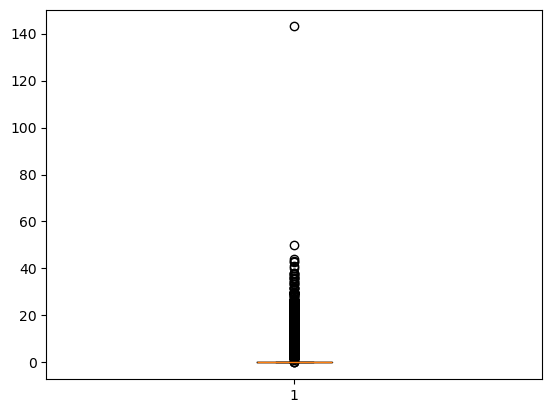

In [93]:
plt.boxplot(df['tolls_amount'])

In [94]:
# removing outliers from tolls_amount
df = df[df['tolls_amount'] < 120]

In [95]:
df = df[df['tip_amount'] < 110]

In [96]:
df[df["RatecodeID"] == 99].shape

(1524, 21)

In [97]:
# 1,526 out of 250,000 entries (~0.6%) have RatecodeID as 99. 
# This is a very small proportion of the data and can be removed.
df = df[df["RatecodeID"] != 99]

In [99]:
# Compute IQR
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]
outliers['trip_distance'].value_counts()

trip_distance
8.80     148
8.50     136
8.60     133
6.80     127
9.20     126
        ... 
23.82      1
51.54      1
39.71      1
39.02      1
39.18      1
Name: count, Length: 2220, dtype: int64

In [100]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  251016.000000                      251016                      251016   
mean        1.753191  2023-07-01 23:17:41.118769  2023-07-01 23:34:53.262633   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         2.000000  2023-04-01 22:26:50.750000         2023-04-01 22:39:29   
50%         2.000000  2023-06-26 10:40:33.500000  2023-06-26 10:57:08.500000   
75%         2.000000  2023-10-05 21:28:09.500000         2023-10-05 21:46:03   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.431155                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    251016.000000  251016.000000  251016.000000  251016.000000   
mean          1.391720       3.433993       1.074617     165.504271   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.060000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.350000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.882263       4.528351       0.392815      63.649164   

        DOLocationID   payment_type    fare_amount          extra  \
count  251016.000000  251016.000000  251016.000000  251016.000000   
mean      164.384254       1.205449      19.691933       1.620496   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     455.200000      14.250000   
std        69.660867       0.465899      18.177147       1.825963   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  251016.000000  251016.000000  251016.000000          251016.000000   
mean        0.495461       3.606045       0.590160               0.999492   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.880000       0.000000               1.000000   
75%         0.500000       4.480000       0.000000               1.000000   
max         0.800000     103.840000      50.000000               1.000000   
std         0.047500       4.052472       2.150386               0.020337   

        total_amount  congestion_surcharge    pickup_hour    Airport_fee  
count  251016.000000         251016.000000  251016.000000  251016.000000  
mean       28.867301              2.322133      14.322378       0.144777  
min         1.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000      11.000000       0.000000  
50%        21.000000              2.500000      15.000000       0.000000  
75%        30.600000              2.500000      19.000000       0.000000  
max       488.700000              2.500000      23.000000       1.750000  
std        22.860776              0.642676       5.784559       0.467313

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9001d3020>,
 'caps': [<matplotlib.lines.Line2D at 0x1e900648470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9001d0230>],
 'medians': [<matplotlib.lines.Line2D at 0x1e900648bc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e900648ce0>],
 'means': []}

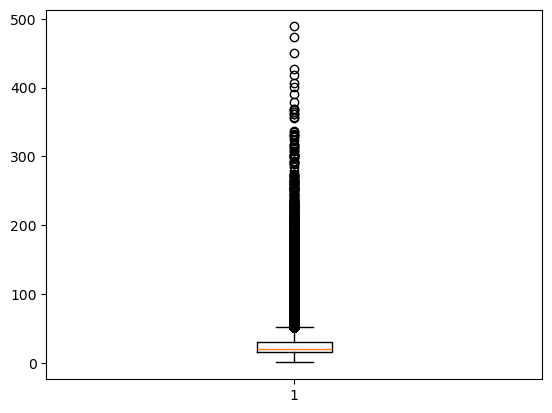

In [101]:
# draw box plot for  df['total_amount']
plt.boxplot(df['total_amount'])

In [102]:
df['payment_type'].value_counts()

payment_type
1    204317
2     43710
4      1883
3      1106
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e900652a20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e900652fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e900652750>],
 'medians': [<matplotlib.lines.Line2D at 0x1e900653530>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e900653830>],
 'means': []}

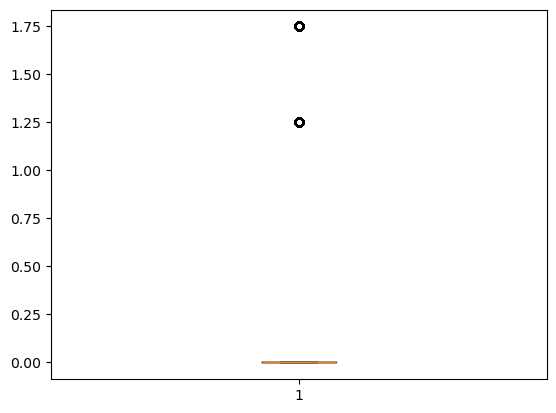

In [103]:
plt.boxplot(df['Airport_fee'])

In [104]:
# value counts for year
df['tpep_pickup_datetime'].dt.year.value_counts()

tpep_pickup_datetime
2023    251016
Name: count, dtype: int64

In [105]:
# value counts for drop time
df['tpep_dropoff_datetime'].dt.year.value_counts()

tpep_dropoff_datetime
2023    251014
2024         2
Name: count, dtype: int64

In [106]:
#Result: All outliers are cleaned based on value count and boxplot diagrams.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [107]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [108]:
# VendorID: Categorical
# tpep_pickup_datetime: Numerical
# tpep_dropoff_datetime: Numerical
# passenger_count: Numerical
# trip_distance: Numerical
# RatecodeID: Numerical
# PULocationID: Categorical
# DOLocationID: Categorical
# payment_type: Categorical
# pickup_hour: Categorical
# trip_duration: Numerical

In [109]:
# fare_amount : Numerical
# extra : Numerical
# mta_tax : Numerical
# tip_amount : Numerical
# tolls_amount : Numerical
# improvement_surcharge : Numerical
# total_amount : Numerical
# congestion_surcharge : Numerical
# airport_fee : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

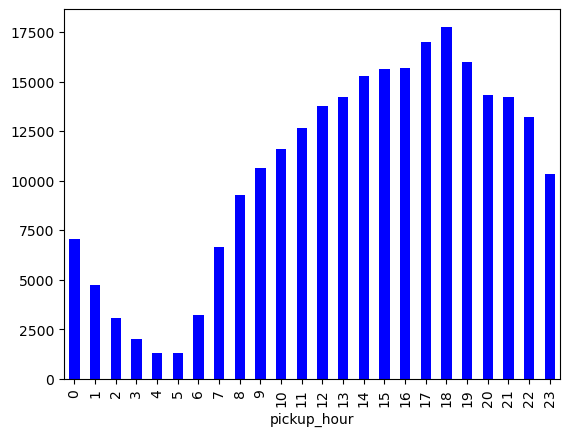

In [113]:
# Find and show the hourly trends in taxi pickups
hourly_trends = df.groupby("pickup_hour").size()
hourly_trends.shape

# Plot the histogram for hourly_trends
hourly_trends.plot(kind='bar', color='blue')
plt.show()

In [114]:
# Find and show the daily trends in taxi pickups (days of the week)

# extract day of week from pickup date and create a new column
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()


In [115]:
df['day_of_week'].value_counts()

day_of_week
Thursday     39401
Wednesday    38579
Friday       37204
Saturday     36545
Tuesday      36400
Sunday       31630
Monday       31257
Name: count, dtype: int64

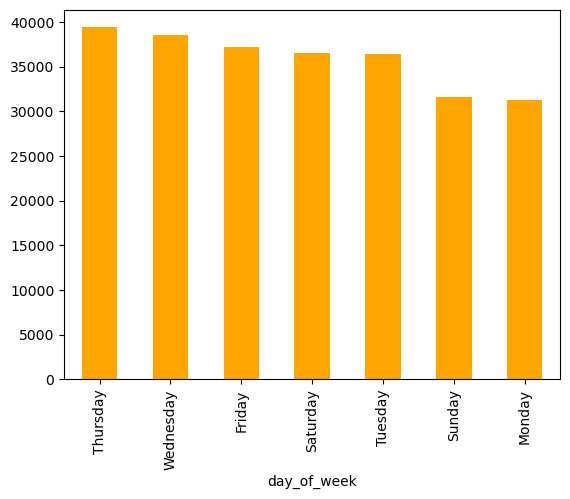

In [118]:
daily_trends = df['day_of_week'].value_counts()

daily_trends.plot(kind='bar', color='orange')
plt.show()

In [119]:
# Show the monthly trends in pickups
df['month'] = df['tpep_pickup_datetime'].dt.month_name()


In [120]:
df['month'].value_counts()

month
May          23106
October      22895
March        22432
June         21830
November     21741
April        21736
December     21637
January      20350
February     19284
July         19149
August       18506
September    18350
Name: count, dtype: int64

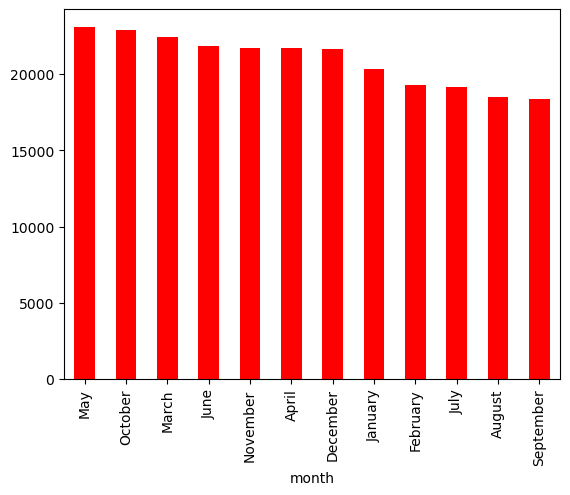

In [122]:
monthly_trends = df['month'].value_counts()

monthly_trends.plot(kind='bar', color='red')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [124]:
# Analyse the above parameters
# get all columns with any negative values out of these financial parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_columns:
    print("Negative values in column '{}' : {}".format(col, (df[col] < 0).sum()))

# Check for zero values in the financial parameters
for col in financial_columns:
    print("Zero values in column '{}' : {}".format(col, (df[col] == 0).sum()))

Negative values in column 'fare_amount' : 0
Negative values in column 'tip_amount' : 0
Negative values in column 'total_amount' : 0
Negative values in column 'trip_distance' : 0
Zero values in column 'fare_amount' : 51
Zero values in column 'tip_amount' : 54816
Zero values in column 'total_amount' : 0
Zero values in column 'trip_distance' : 2891


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [125]:
# Yes, it is beneficial

In [128]:
# adding new column trip duration from drop and pick up times
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [129]:
# Create a df with non zero entries for the selected parameters.
df1 = df[(df['trip_distance'] > 0) & (df['trip_duration'])]
df1.shape

(248115, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

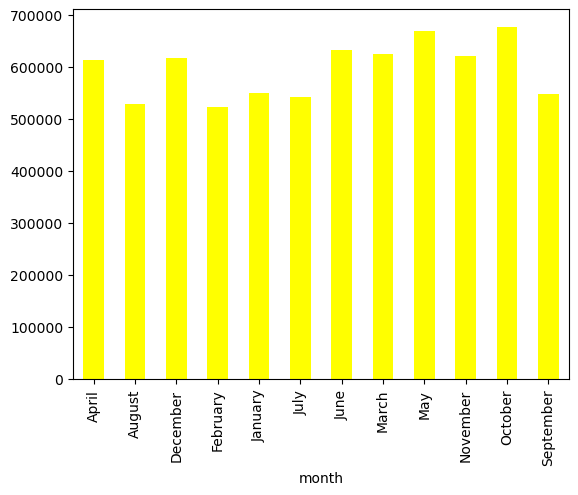

In [131]:
# Group data by month and analyse monthly revenue
monthly_revenue = df1.groupby('month')['total_amount'].sum()

monthly_revenue.plot(kind='bar', color='yellow')
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [132]:
# Calculate proportion of each quarter
# Extract the quarter
df1["Quarter"] = df1["tpep_pickup_datetime"].dt.quarter

# Group by quarter and sum total amount
quarterly_totals = df1.groupby("Quarter")["total_amount"].sum()

quarterly_totals.value_counts



<bound method IndexOpsMixin.value_counts of Quarter
1    1696561.08
2    1912590.85
3    1616944.73
4    1911936.26
Name: total_amount, dtype: float64>

In [133]:
# Calculate proportion
quarterly_proportion = quarterly_totals / quarterly_totals.sum()

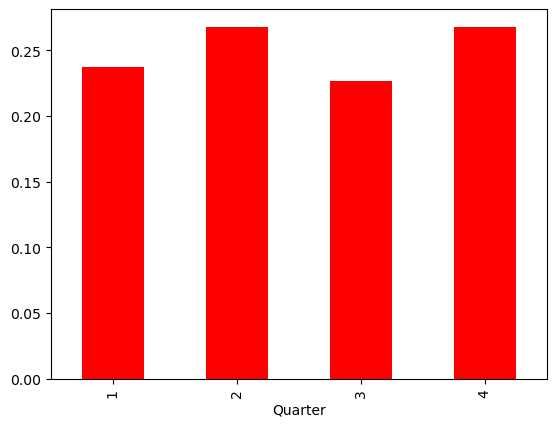

In [134]:
quarterly_proportion.plot(kind='bar', color='red')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

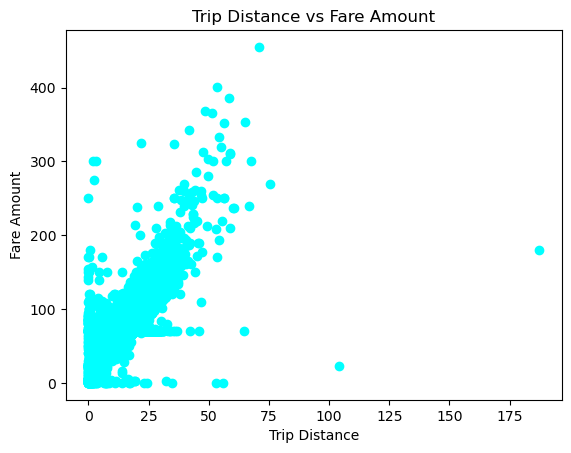

In [136]:
# Show how trip fare is affected by distance
# Plot a scatter plot for trip_distance vs fare_amount
plt.scatter(df1['trip_distance'], df1['fare_amount'], color='cyan')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()


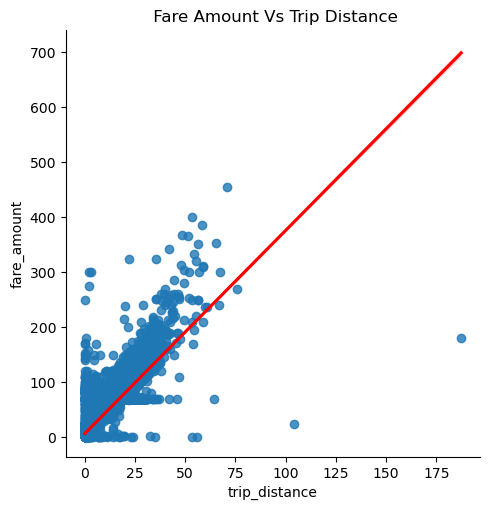

In [143]:
# find the correlation value for these two and draw correlation line on scatter plot
correlation = df1['trip_distance'].corr(df1['fare_amount'])
sns.lmplot(x='trip_distance', y='fare_amount', data=df1, line_kws={'color': 'red'})
plt.title(' Fare Amount Vs Trip Distance')
plt.show()

In [144]:
df1[df1['trip_distance'] > 100][['payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'trip_distance']].head()


payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
83711              1        180.0    0.0      0.0        0.15         12.75   
154264             1         23.3    0.0      0.5        2.73          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
83711                     1.0        193.90                   0.0   
154264                    1.0         30.03                   2.5   

        Airport_fee  trip_distance  
83711           0.0         187.35  
154264          0.0         104.30

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

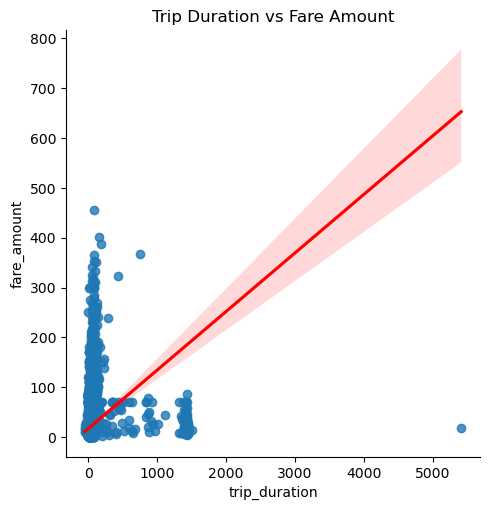

In [145]:
# Show relationship between fare and trip duration
# Plot a scatter plot for trip_duration vs fare_amount
# find the correlation value for these two and draw correlation line on scatter plot
correlation = df1['trip_duration'].corr(df1['fare_amount'])
sns.lmplot(x='trip_duration', y='fare_amount', data=df1, line_kws={'color': 'red'})
plt.title('Trip Duration vs Fare Amount')
plt.show()

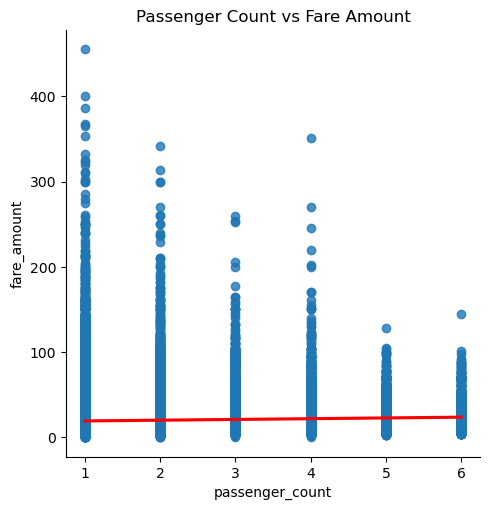

0.04369082471724621

In [146]:
# Show relationship between fare and number of passengers
# Plot a scatter plot for passenger_count vs fare_amount
# find the correlation value for these two and draw correlation line on scatter plot
correlation = df1['passenger_count'].corr(df1['fare_amount'])
sns.lmplot(x='passenger_count', y='fare_amount', data=df1, line_kws={'color': 'red'})
plt.title('Passenger Count vs Fare Amount')
plt.show()
correlation

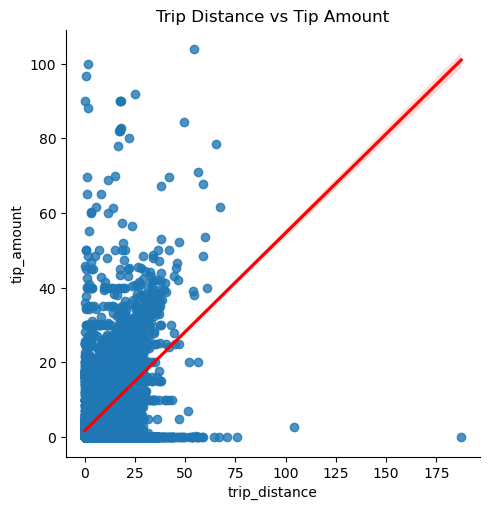

0.6005454541558141

In [147]:
# Show relationship between tip and trip distance
# Plot a scatter plot for trip_distance vs tip_amount
# find the correlation value for these two and draw correlation line on scatter plot
correlation = df1['trip_distance'].corr(df1['tip_amount'])
sns.lmplot(x='trip_distance', y='tip_amount', data=df1, line_kws={'color': 'red'})
plt.title('Trip Distance vs Tip Amount')
plt.show()
correlation

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

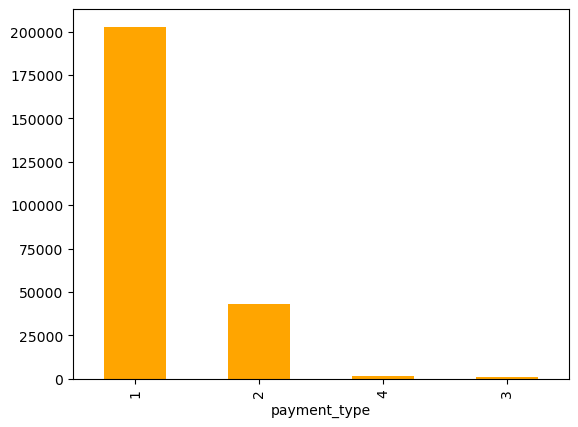

In [148]:
# Analyse the distribution of different payment types (payment_type).
# Group the data by payment_type and count the number of trips for each payment type
payment_type_distribution = df1['payment_type'].value_counts()

payment_type_distribution.plot(kind='bar', color='orange')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [150]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 3.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/16.2 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/16.2 MB 4.3 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.2 MB 4.1 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/16.2 MB 4.3 MB/s eta 0:00:03
   ----------- ---------------------------- 4.7/16.2 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 6.0/16.2 MB 4.3 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.2 MB 4.5 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/16.2 MB 4.6 MB/s eta 0:00:02
   ---------------------- ----------------- 9.2/16.2 MB 4.7 MB/s eta 0:00:02
   ------------------------- -------------- 10.5/16.2 MB 4.7 MB/s eta 0:00:02
   ----------------------------- ---------- 11.8/16.2 MB 4.8 MB/s eta 0:00:01
   -

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [152]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\AnjaliKhertala\OneDrive - Xebia\upgrad\EDA\Assignments_EDA\data_NYC_Taxi\DatasetsandDictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

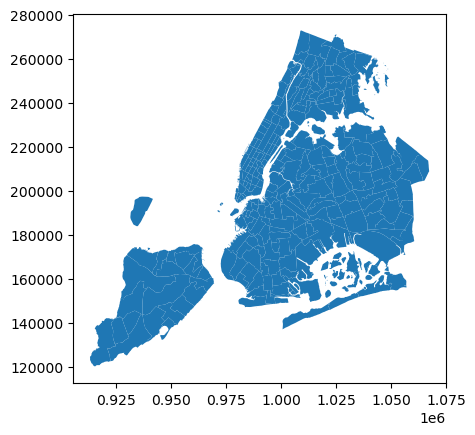

In [153]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [154]:
# Merge zones and trip records using locationID and PULocationID

# Merge df1 with zones to get the zone name for PULocationID
df1 = df1.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Merge df1 with zones to get the zone name for DULocationID
df1 = df1.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

df1.rename(columns={'zone_x': 'pickup_zone'}, inplace=True)
df1.rename(columns={'zone_y': 'dropoff_zone'}, inplace=True)

df1[['PULocationID', 'DOLocationID', 'pickup_zone', 'dropoff_zone']].head()


PULocationID  DOLocationID                pickup_zone  \
0           138           256          LaGuardia Airport   
1           161           237             Midtown Center   
2           237           141      Upper East Side South   
3           143           142        Lincoln Square West   
4           246            37  West Chelsea/Hudson Yards   

                dropoff_zone  
0  Williamsburg (South Side)  
1      Upper East Side South  
2            Lenox Hill West  
3        Lincoln Square East  
4             Bushwick South

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

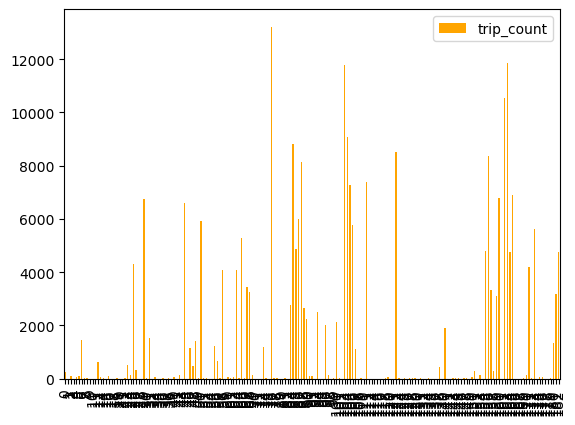

pickup_zone  trip_count
76             JFK Airport       13224
163  Upper East Side South       11859
103         Midtown Center       11768
162  Upper East Side North       10556
104           Midtown East        9070

In [157]:
# Group data by location and calculate the number of trips

location_trends = df1.groupby('pickup_zone').size().reset_index(name='trip_count')

location_trends.plot(kind='bar', color='orange')
plt.show()

location_trends.sort_values(by='trip_count', ascending=False).head()


In [158]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

<Axes: >

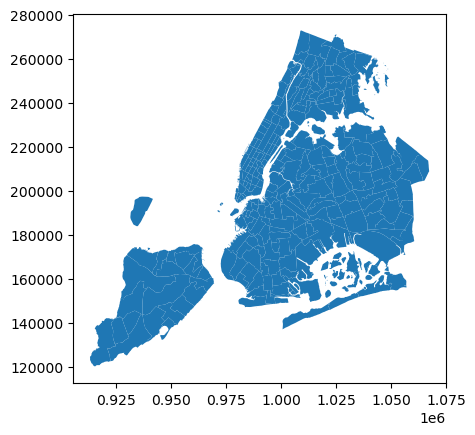

In [159]:
zones.plot()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [160]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(location_trends, left_on='zone', right_on='pickup_zone', how='left')
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

      pickup_zone  trip_count  
0  Newark Airport         5.0  
1             NaN         NaN  
2             NaN         NaN  
3   Alphabet City       233.0  
4             NaN         NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

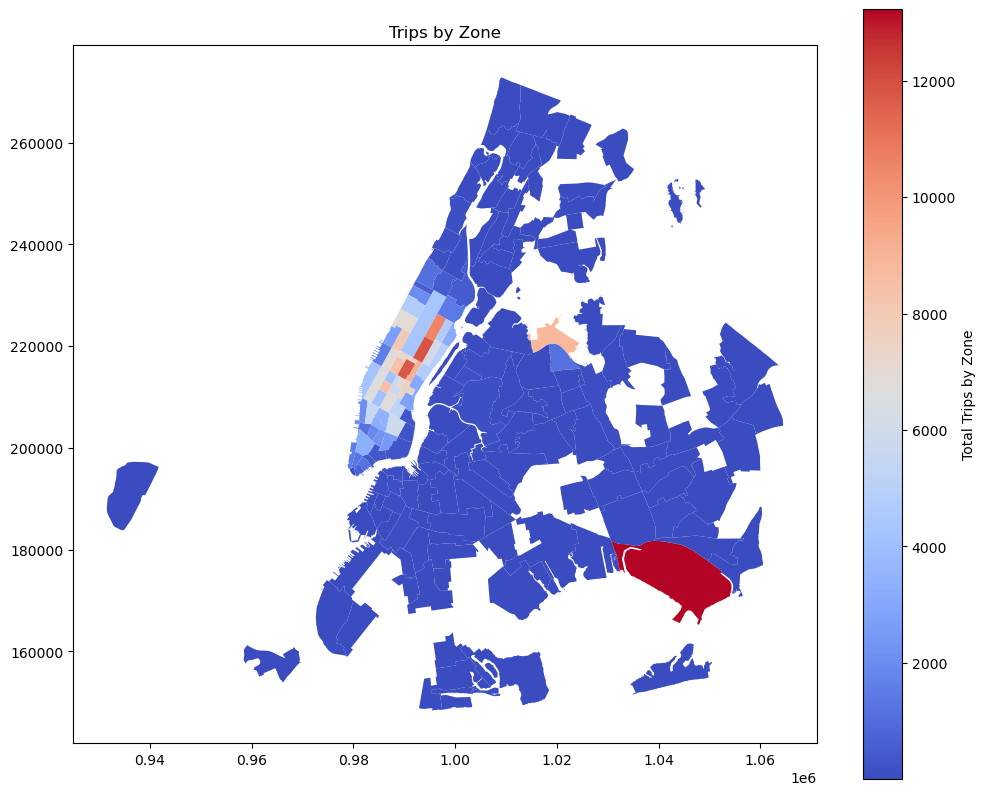

In [161]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Total Trips by Zone"})
plt.title('Trips by Zone')
plt.show()


In [162]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by='trip_count', ascending=False)


OBJECTID  Shape_Leng  Shape_Area                           zone  \
131       132    0.245479    0.002038                    JFK Airport   
236       237    0.042213    0.000096          Upper East Side South   
160       161    0.035804    0.000072                 Midtown Center   
235       236    0.044252    0.000103          Upper East Side North   
161       162    0.035270    0.000048                   Midtown East   
..        ...         ...         ...                            ...   
249       250    0.079626    0.000241  Westchester Village/Unionport   
250       251    0.137711    0.000626                    Westerleigh   
251       252    0.158004    0.001025                     Whitestone   
252       253    0.036051    0.000078                  Willets Point   
258       259    0.126750    0.000395             Woodlawn/Wakefield   

     LocationID        borough  \
131         132         Queens   
236         237      Manhattan   
160         161      Manhattan   
235         236      Manhattan   
161         162      Manhattan   
..          ...            ...   
249         250          Bronx   
250         251  Staten Island   
251         252         Queens   
252         253         Queens   
258         259          Bronx   

                                              geometry            pickup_zone  \
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...            JFK Airport   
236  POLYGON ((993633.442 216961.016, 993507.232 21...  Upper East Side South   
160  POLYGON ((991081.026 214453.698, 990952.644 21...         Midtown Center   
235  POLYGON ((995940.048 221122.92, 995812.322 220...  Upper East Side North   
161  POLYGON ((992224.354 214415.293, 992096.999 21...           Midtown East   
..                                                 ...                    ...   
249  POLYGON ((1026991.885 245048.502, 1027255.054 ...                    NaN   
250  POLYGON ((947868.004 169247.734, 948000.981 16...                    NaN   
251  POLYGON ((1033946.683 231157.996, 1033973.166 ...                    NaN   
252  POLYGON ((1028825.348 218121.42, 1029152.461 2...                    NaN   
258  POLYGON ((1025414.782 270986.139, 1025138.624 ...                    NaN   

     trip_count  
131     13224.0  
236     11859.0  
160     11768.0  
235     10556.0  
161      9070.0  
..          ...  
249         NaN  
250         NaN  
251         NaN  
252         NaN  
258         NaN  

[263 rows x 9 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [163]:
# Find routes which have the slowest speeds at different times of the day

# Calculate the speed of each trip
df1['speed'] = df1['trip_distance'] / (df1['trip_duration'] / 60)

df1 = df1[df1['speed'] > 0]

# Group by pickup_zone, dropoff_zone, and pickup_hour, then calculate the average trip duration
slow_routes = df1.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed'].mean().reset_index()

# Sort by trip_duration to identify the slowest routes
slow_routes = slow_routes.sort_values(by='speed', ascending=True)

# Display the slowest routes
slow_routes.head(10)


PULocationID  DOLocationID  pickup_hour     speed
55589           260           129           17  0.040746
58344           264           237           15  0.043036
41212           209           232           13  0.043579
15729           113           235           22  0.048105
4761             50            43            8  0.059525
10955            88           144            0  0.074923
42985           229           137            2  0.081157
39296           181           132           20  0.091611
17699           128           128            7  0.115385
34022           162           114           11  0.124890

In [164]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248185 entries, 0 to 248193
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               248185 non-null  int64         
 1   tpep_pickup_datetime   248185 non-null  datetime64[us]
 2   tpep_dropoff_datetime  248185 non-null  datetime64[us]
 3   passenger_count        248185 non-null  float64       
 4   trip_distance          248185 non-null  float64       
 5   RatecodeID             248185 non-null  float64       
 6   store_and_fwd_flag     248185 non-null  object        
 7   PULocationID           248185 non-null  int64         
 8   DOLocationID           248185 non-null  int64         
 9   payment_type           248185 non-null  int64         
 10  fare_amount            248185 non-null  float64       
 11  extra                  248185 non-null  float64       
 12  mta_tax                248185 non-null  float64  

In [165]:
df1.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  248185.000000                      248185                      248185   
mean        1.753942  2023-07-01 23:01:38.153438  2023-07-01 23:18:57.282450   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:17:32   
25%         2.000000         2023-04-01 22:31:21         2023-04-01 22:45:10   
50%         2.000000         2023-06-26 08:54:10         2023-06-26 09:06:35   
75%         2.000000         2023-10-05 22:14:24         2023-10-05 22:28:39   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.430714                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    248185.000000  248185.000000  248185.000000  248185.000000   
mean          1.392139       3.475398       1.062135     165.494446   
min           1.000000       0.010000       1.000000       1.000000   
25%           1.000000       1.090000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.883111       4.539788       0.329252      63.572328   

        DOLocationID   payment_type    fare_amount  ...  \
count  248185.000000  248185.000000  248185.000000  ...   
mean      164.282926       1.200270      19.577461  ...   
min         1.000000       1.000000       0.000000  ...   
25%       114.000000       1.000000       9.300000  ...   
50%       162.000000       1.000000      13.500000  ...   
75%       234.000000       1.000000      21.900000  ...   
max       265.000000       4.000000     455.200000  ...   
std        69.642826       0.455962      17.792146  ...   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          248185.000000  248185.000000         248185.000000   
mean                0.999691      28.774247              2.334629   
min                 0.000000       1.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.600000              2.500000   
max                 1.000000     488.700000              2.500000   
std                 0.014736      22.524063              0.621354   

         pickup_hour    Airport_fee  trip_duration        Quarter  \
count  248185.000000  248185.000000  248185.000000  248185.000000   
mean       14.333215       0.144850      17.318817       2.503862   
min         0.000000       0.000000       0.016667       1.000000   
25%        11.000000       0.000000       7.700000       2.000000   
50%        15.000000       0.000000      12.616667       2.000000   
75%        19.000000       0.000000      20.433333       4.000000   
max        23.000000       1.750000    5411.000000       4.000000   
std         5.780080       0.467418      41.291285       1.128202   

        LocationID_x   LocationID_y          speed  
count  245988.000000  244946.000000  248185.000000  
mean      164.615355     162.961269      11.864614  
min         1.000000       1.000000       0.005544  
25%       132.000000     113.000000       7.191108  
50%       161.000000     162.000000       9.664430  
75%       233.000000     234.000000      13.371429  
max       263.000000     263.000000   17550.000000  
std        63.166939      69.139240      60.911152  

[8 rows x 24 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

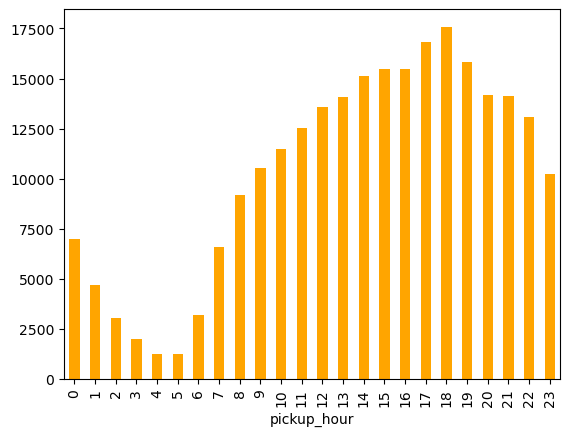

In [166]:
# Visualise the number of trips per hour and find the busiest hour
# Group the data by pickup_hour and count the number of trips in each hour
hourly_trends = df1.groupby("pickup_hour").size()
hourly_trends.shape

# Plot the histogram for hourly_trends
# plt.figure(figsize=(12, 6))
hourly_trends.plot(kind='bar', color='orange')
plt.show()

# Find the busiest hour
busiest_hour = hourly_trends.idxmax()


In [167]:
busiest_hour

18

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [168]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.007
scaled_hourly_trends = hourly_trends * (1 / sample_fraction)
scaled_hourly_trends


pickup_hour
0     9.954286e+05
1     6.662857e+05
2     4.347143e+05
3     2.834286e+05
4     1.798571e+05
5     1.802857e+05
6     4.568571e+05
7     9.384286e+05
8     1.308429e+06
9     1.503286e+06
10    1.641143e+06
11    1.786714e+06
12    1.940714e+06
13    2.009000e+06
14    2.163571e+06
15    2.209000e+06
16    2.210000e+06
17    2.402429e+06
18    2.511571e+06
19    2.258714e+06
20    2.025714e+06
21    2.016714e+06
22    1.868571e+06
23    1.464143e+06
dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

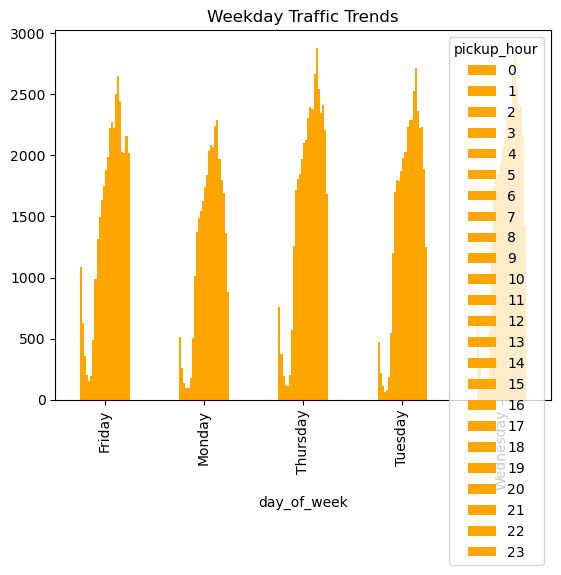

In [169]:
# Compare traffic trends for the week days and weekends
# Group the data by day_of_week and pickup_hour and count the number of trips in each hour
weekday_hourly_trends = df1[df1['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(['day_of_week', 'pickup_hour']).size()
weekend_hourly_trends = df1[df1['day_of_week'].isin(['Saturday', 'Sunday'])].groupby(['day_of_week', 'pickup_hour']).size()

# Plot the histogram for hourly_trends
# plt.figure(figsize=(12, 6))
weekday_hourly_trends.unstack().plot(kind='bar', color='orange')
plt.title('Weekday Traffic Trends')
plt.show()


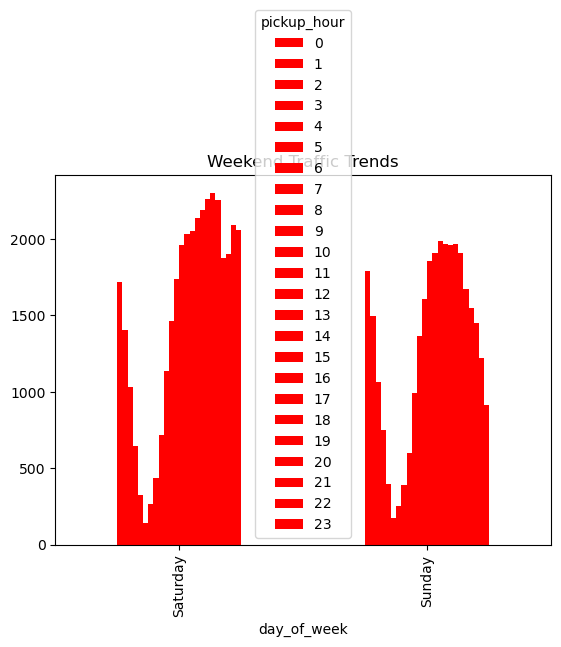

In [170]:
# plt.figure(figsize=(12, 6))
weekend_hourly_trends.unstack().plot(kind='bar', color='red')
plt.title('Weekend Traffic Trends')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

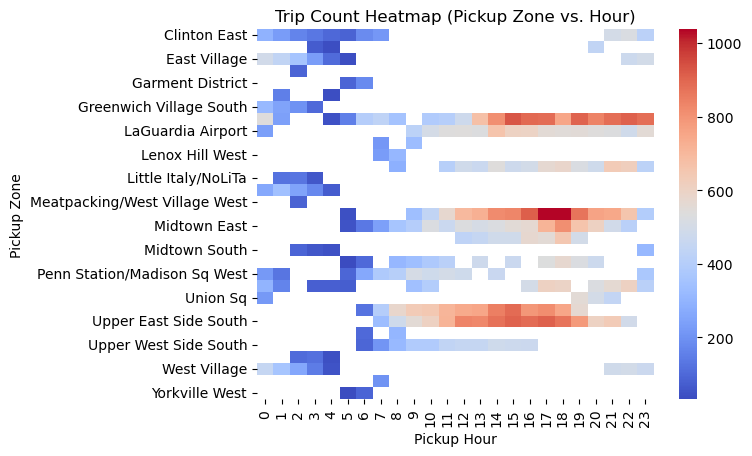

Text(50.7222222222222, 0.5, 'Dropoff Zone')

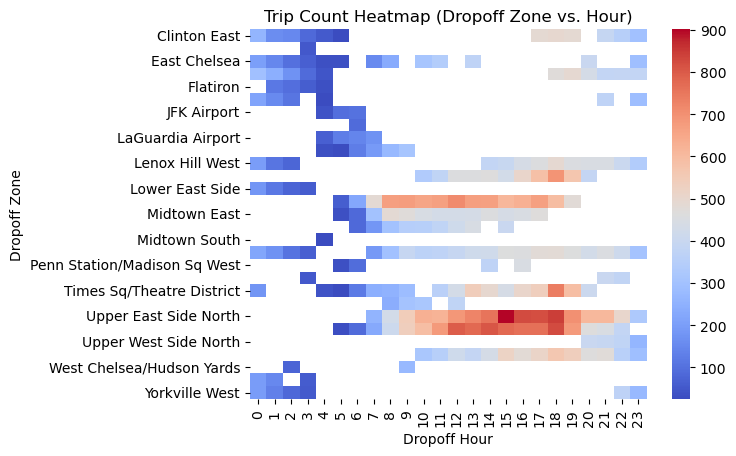

In [171]:
# Find top 10 pickup and dropoff zones
# Group the data by PULocationID and DOLocationID and pickup_hour and dropoff_hour
# create drop off hopur column
df1['dropoff_hour'] = df1['tpep_dropoff_datetime'].dt.hour

# filter top 10 pickup and dropoff zones by trip_count for each pickup and dropoff hour
top_pickup_zones = df1.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='trip_count')
top_dropoff_zones = df1.groupby(['dropoff_zone', 'dropoff_hour']).size().reset_index(name='trip_count')

# top_pickup_zones.head(30)

# Sort by trip_count to identify the busiest zones
top_pickup_zones = top_pickup_zones.sort_values(by='trip_count', ascending=False)
top_dropoff_zones = top_dropoff_zones.sort_values(by='trip_count', ascending=False)

pickup_data = {
    'pickup_zone': top_pickup_zones['pickup_zone'].values,
    'pickup_hour': top_pickup_zones['pickup_hour'].values,
    'trip_count': top_pickup_zones['trip_count'].values
}

dropoff_data = {
    'dropoff_zone': top_dropoff_zones['dropoff_zone'].values,
    'dropoff_hour': top_dropoff_zones['dropoff_hour'].values,
    'trip_count': top_dropoff_zones['trip_count'].values
}

pickup_data_df = pd.DataFrame(pickup_data)
dropoff_data_df = pd.DataFrame(dropoff_data)

# filter top 10 pickup and dropoff zones by trip_count for each pickup and dropoff hour
pickup_data_df = pickup_data_df.groupby('pickup_hour').apply(lambda x: x.nlargest(10, 'trip_count')).reset_index(drop=True)
dropoff_data_df = dropoff_data_df.groupby('dropoff_hour').apply(lambda x: x.nlargest(10, 'trip_count')).reset_index(drop=True)


pivot_pickup = pickup_data_df.pivot(index='pickup_zone', columns='pickup_hour', values='trip_count')
pivot_dropoff = dropoff_data_df.pivot(index='dropoff_zone', columns='dropoff_hour', values='trip_count')

sns.heatmap(pivot_pickup, annot=False, cmap='coolwarm')
plt.title("Trip Count Heatmap (Pickup Zone vs. Hour)")
plt.xlabel("Pickup Hour")
plt.ylabel("Pickup Zone")
plt.show()

sns.heatmap(pivot_dropoff, annot=False, cmap='coolwarm')
plt.title("Trip Count Heatmap (Dropoff Zone vs. Hour)")
plt.xlabel("Dropoff Hour")
plt.ylabel("Dropoff Zone")



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [172]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Group the data by PULocationID and DOLocationID and count the number of trips in each zone
pickup_dropoff_ratios = df1.groupby(['pickup_zone', 'dropoff_zone']).size().reset_index(name='trip_count')

# Calculate the total number of trips for each pickup zone
pickup_totals = pickup_dropoff_ratios.groupby('pickup_zone')['trip_count'].sum().reset_index(name='total_trips')

# Calculate the total number of trips for each dropoff zone
dropoff_totals = pickup_dropoff_ratios.groupby('dropoff_zone')['trip_count'].sum().reset_index(name='total_trips')

# Merge the pickup and dropoff totals with the pickup_dropoff_ratios
pickup_dropoff_ratios = pickup_dropoff_ratios.merge(pickup_totals, left_on='pickup_zone', right_on='pickup_zone', how='left')
pickup_dropoff_ratios = pickup_dropoff_ratios.merge(dropoff_totals, left_on='dropoff_zone', right_on='dropoff_zone', how='left')

# Calculate the pickup/dropoff ratio
pickup_dropoff_ratios['pickup_dropoff_ratio'] = pickup_dropoff_ratios['trip_count'] / pickup_dropoff_ratios['total_trips_x']

# Sort by pickup_dropoff_ratio to identify the busiest zones
pickup_dropoff_ratios = pickup_dropoff_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False)

# Find the top 10 and bottom 10 pickup/dropoff ratios
top_ratios = pickup_dropoff_ratios['pickup_dropoff_ratio'].head(10)
bottom_ratios = pickup_dropoff_ratios['pickup_dropoff_ratio'].tail(10)

print(top_ratios)

print(bottom_ratios)



5270    1.0
3121    1.0
7441    1.0
5568    1.0
299     1.0
1799    1.0
300     1.0
5812    1.0
5790    1.0
2730    1.0
Name: pickup_dropoff_ratio, dtype: float64
2830    0.000079
2966    0.000079
3020    0.000079
3011    0.000079
2992    0.000079
2993    0.000079
2853    0.000079
2856    0.000079
2866    0.000079
3046    0.000079
Name: pickup_dropoff_ratio, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

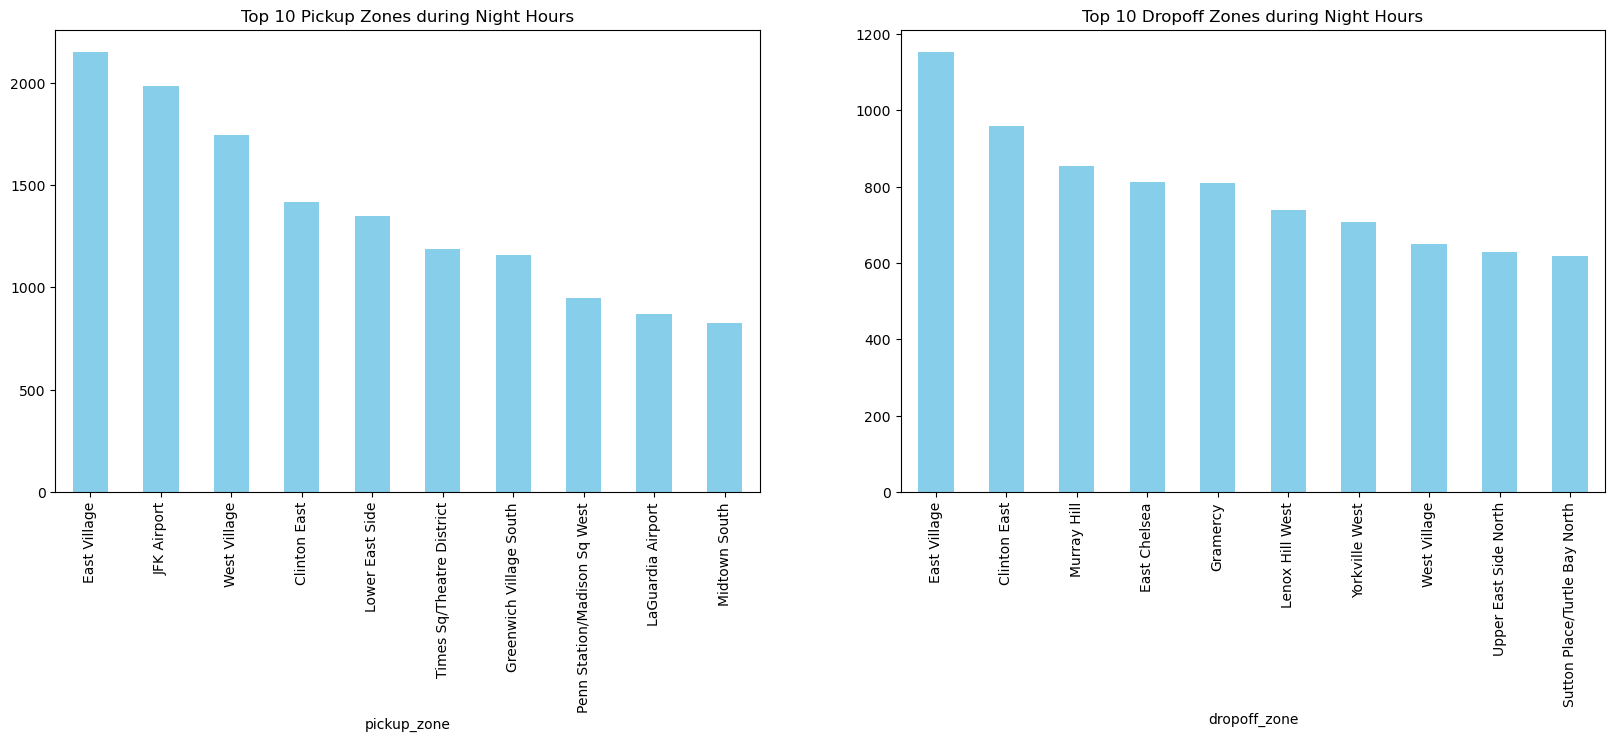

In [173]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Group the data by PULocationID and DOLocationID and pickup_hour and dropoff_hour

night_hours = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] <= 5)]
top_night_pickup_zones = night_hours.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='trip_count')
top_night_dropoff_zones = night_hours.groupby(['dropoff_zone', 'dropoff_hour']).size().reset_index(name='trip_count')

# Sort by trip_count to identify the busiest zones
top_night_pickup_zones = top_night_pickup_zones.sort_values(by='trip_count', ascending=False)
top_night_dropoff_zones = top_night_dropoff_zones.sort_values(by='trip_count', ascending=False)

# Group the data by PULocationID and count the number of trips in each zone
top_night_pickup_zones = night_hours['pickup_zone'].value_counts().head(10)
top_night_pickup_zones

# Group the data by DOLocationID and count the number of trips in each zone
top_night_dropoff_zones = night_hours['dropoff_zone'].value_counts().head(10)
top_night_dropoff_zones

# Visualise the top 10 pickup and dropoff zones during night hours
# Define figure and axis
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

# Plot the top pickup zones
top_night_pickup_zones.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Top 10 Pickup Zones during Night Hours')

# Plot the top dropoff zones
top_night_dropoff_zones.plot(kind='bar', color='skyblue', ax=ax[1])
ax[1].set_title('Top 10 Dropoff Zones during Night Hours')

plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

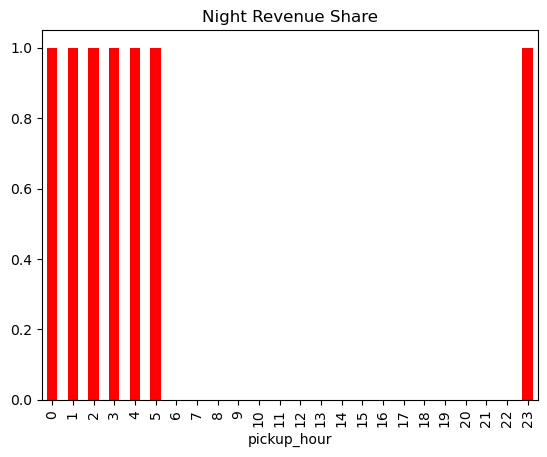

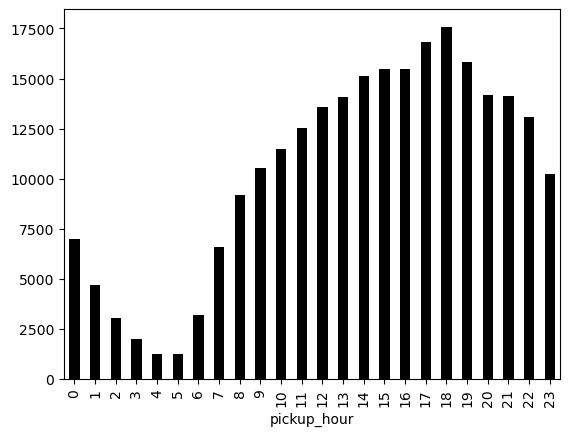

In [174]:
# Filter for night hours (11 PM to 5 AM)

night_hours = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] <= 5)]

# Find the revenue share for nighttime and daytime hours.
# Group the data by pickup_hour and calculate the total revenue in each hour
hourly_revenue = df1.groupby('pickup_hour')['total_amount'].sum()

# Group the data by pickup_hour and calculate the total revenue in each hour for night hours
night_hourly_revenue = night_hours.groupby('pickup_hour')['total_amount'].sum()

# Calculate the revenue share for night hours
night_revenue_share = night_hourly_revenue / hourly_revenue

# Plot the revenue share for night hours
night_revenue_share.plot(kind='bar', color='red')
plt.title('Night Revenue Share')
plt.show()

# Group the data by pickup_hour and count the number of trips in each hour
hourly_trends = df1.groupby("pickup_hour").size()
hourly_trends.shape

# Plot the histogram for hourly_trends
# plt.figure(figsize=(12, 6))
hourly_trends.plot(kind='bar', color='black')
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

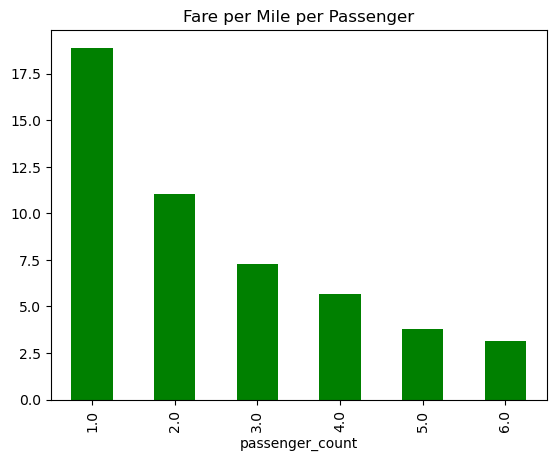

In [175]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate the fare per mile per passenger
df1['fare_per_mile_per_passenger'] = df1['fare_amount'] / df1['passenger_count']

# df1.sort_values(by='fare_per_mile_per_passenger', ascending=False)[['fare_amount', 'trip_distance', 'passenger_count', 'fare_per_mile_per_passenger']].head()

# Group the data by passenger_count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger = df1.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Plot the fare per mile per passenger for different passenger counts
fare_per_mile_per_passenger.plot(kind='bar', color='green')
plt.title('Fare per Mile per Passenger')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

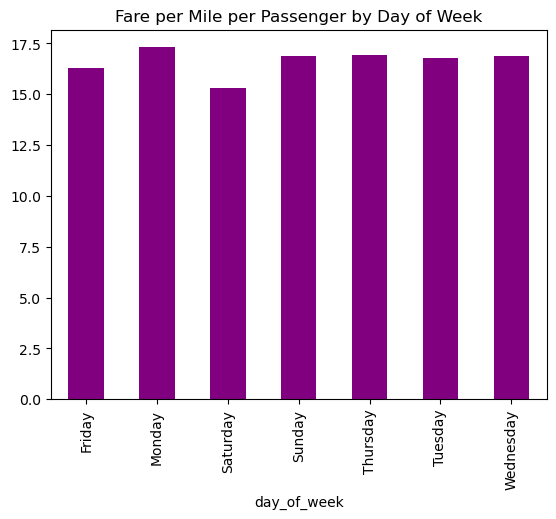

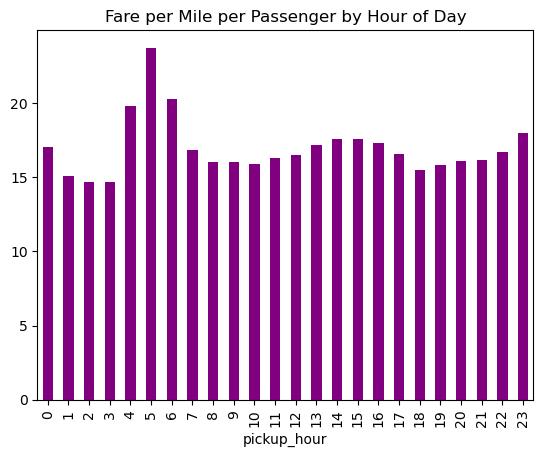

In [176]:
# Compare the average fare per mile for different days and for different times of the day
# Group the data by day_of_week and calculate the average fare per mile
fare_per_mile_per_day = df1.groupby('day_of_week')['fare_per_mile_per_passenger'].mean()

# Group the data by pickup_hour and calculate the average fare per mile
fare_per_mile_per_hour = df1.groupby('pickup_hour')['fare_per_mile_per_passenger'].mean()

# Plot the fare per mile for different days of the week
fare_per_mile_per_day.plot(kind='bar', color='purple')
plt.title('Fare per Mile per Passenger by Day of Week')
plt.show()

# Plot the fare per mile for different times of the day
fare_per_mile_per_hour.plot(kind='bar', color='purple')
plt.title('Fare per Mile per Passenger by Hour of Day')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

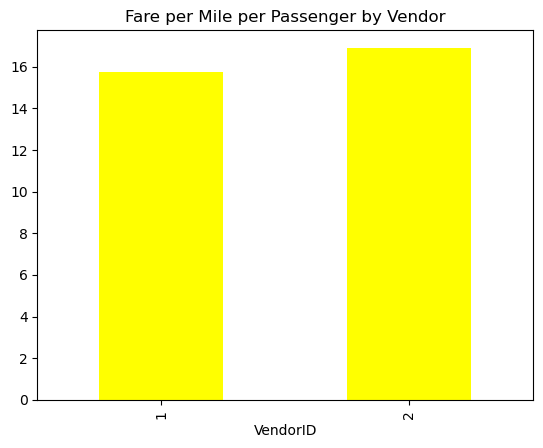

In [177]:
# Compare fare per mile for different vendors
# Group the data by VendorID and calculate the average fare per mile
fare_per_mile_per_vendor = df1.groupby('VendorID')['fare_per_mile_per_passenger'].mean()

# Plot the fare per mile for different vendors
fare_per_mile_per_vendor.plot(kind='bar', color='yellow')
plt.title('Fare per Mile per Passenger by Vendor')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


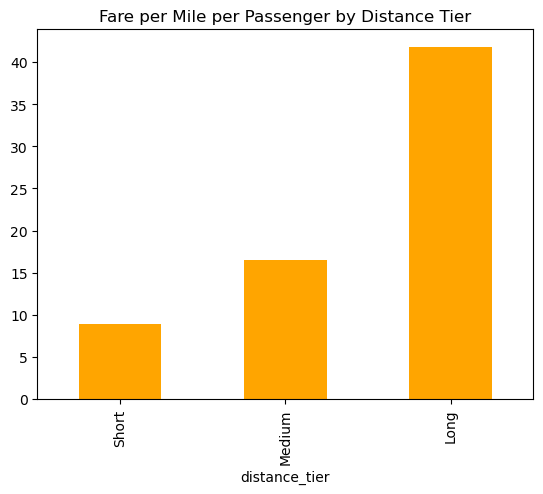

In [178]:
# Defining distance tiers
distance_bins = [0, 2, 5, 1000]
distance_labels = ['Short', 'Medium', 'Long']

# Create a new column for distance tiers
df1['distance_tier'] = pd.cut(df1['trip_distance'], bins=distance_bins, labels=distance_labels)

# Group the data by distance_tier and calculate the average fare per mile
fare_per_mile_per_distance_tier = df1.groupby('distance_tier')['fare_per_mile_per_passenger'].mean()

# Plot the fare per mile for different distance tiers
fare_per_mile_per_distance_tier.plot(kind='bar', color='orange')
plt.title('Fare per Mile per Passenger by Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

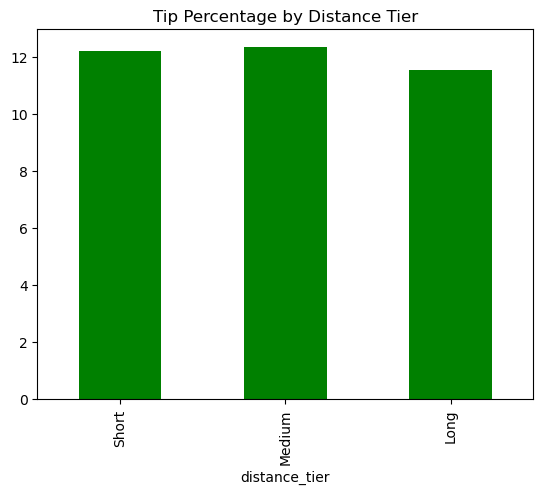

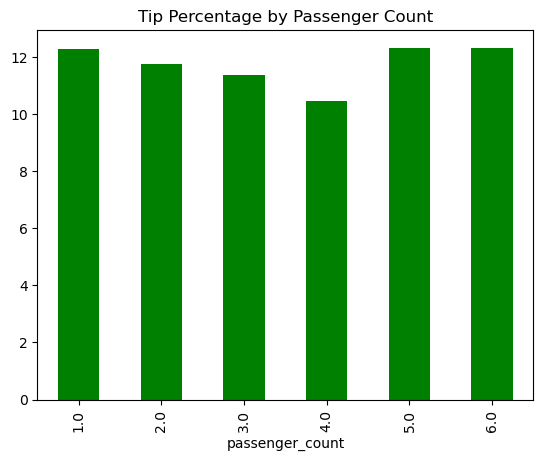

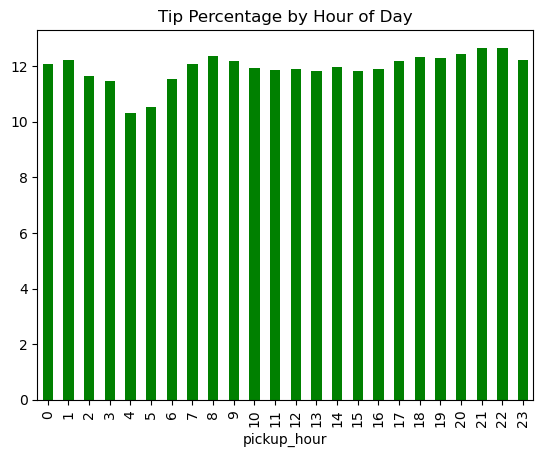

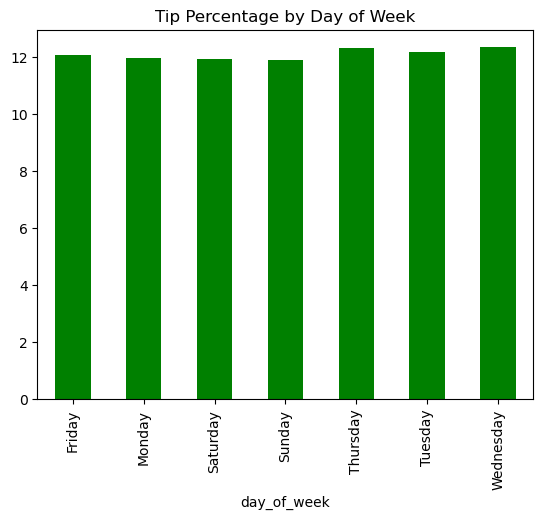

In [179]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate the tip percentage
df1['tip_percentage'] = (df1['tip_amount'] / df1['total_amount']) * 100

# Group the data by distance_tier and calculate the average tip percentage
tip_percentage_per_distance_tier = df1.groupby('distance_tier')['tip_percentage'].mean()

# Group the data by passenger_count and calculate the average tip percentage
tip_percentage_per_passenger_count = df1.groupby('passenger_count')['tip_percentage'].mean()

# Group the data by pickup_hour and calculate the average tip percentage
tip_percentage_per_hour = df1.groupby('pickup_hour')['tip_percentage'].mean()

# Plot the tip percentage for different distance tiers
tip_percentage_per_distance_tier.plot(kind='bar', color='green')
plt.title('Tip Percentage by Distance Tier')
plt.show()

# Plot the tip percentage for different passenger counts
tip_percentage_per_passenger_count.plot(kind='bar', color='green')
plt.title('Tip Percentage by Passenger Count')
plt.show()

# Plot the tip percentage for different times of the day
tip_percentage_per_hour.plot(kind='bar', color='green')
plt.title('Tip Percentage by Hour of Day')
plt.show()

# Analyse the average tip percentage for different days of the week
# Group the data by day_of_week and calculate the average tip percentage
tip_percentage_per_day = df1.groupby('day_of_week')['tip_percentage'].mean()

# Plot the tip percentage for different days of the week
tip_percentage_per_day.plot(kind='bar', color='green')
plt.title('Tip Percentage by Day of Week')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

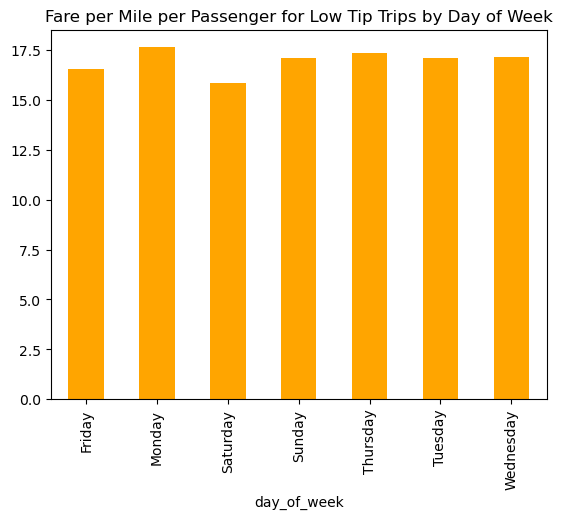

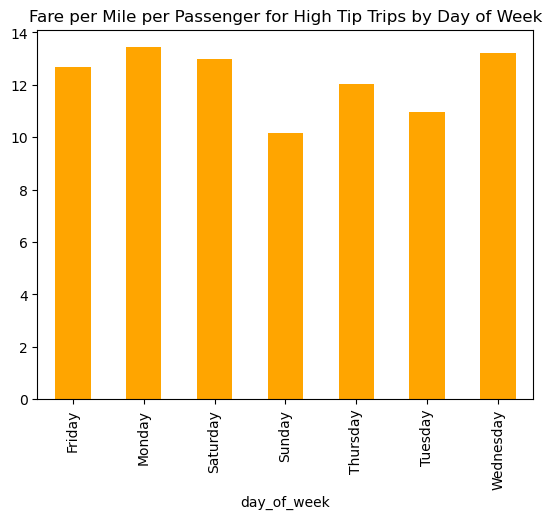

In [180]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter the data for trips with tip percentage < 10% and trips with tip percentage > 25%
low_tip_trips = df1[df1['tip_percentage'] < 10]
high_tip_trips = df1[df1['tip_percentage'] > 25]

# Group the data by day_of_week and calculate the average fare per mile
low_tip_per_day = low_tip_trips.groupby('day_of_week')['fare_per_mile_per_passenger'].mean()
high_tip_per_day = high_tip_trips.groupby('day_of_week')['fare_per_mile_per_passenger'].mean()

# Plot the fare per mile for trips with low tip percentage
low_tip_per_day.plot(kind='bar', color='orange')
plt.title('Fare per Mile per Passenger for Low Tip Trips by Day of Week')
plt.show()

# Plot the fare per mile for trips with high tip percentage
high_tip_per_day.plot(kind='bar', color='orange')
plt.title('Fare per Mile per Passenger for High Tip Trips by Day of Week')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

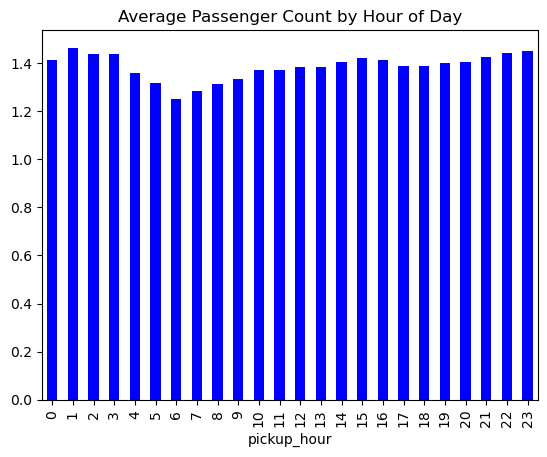

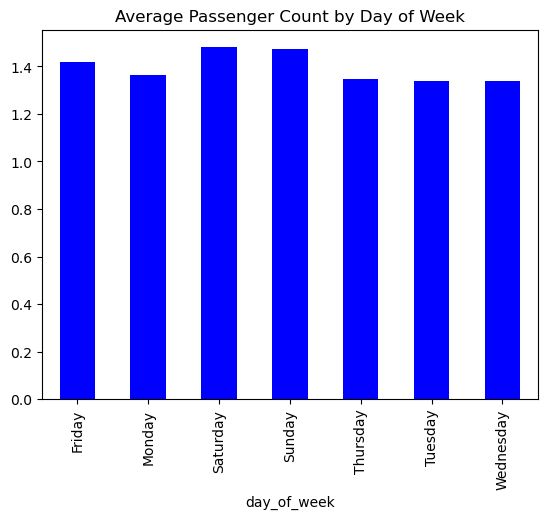

In [181]:
# See how passenger count varies across hours and days
# Group the data by pickup_hour and passenger_count and calculate the average fare per mile
passenger_count_per_hour = df1.groupby('pickup_hour')['passenger_count'].mean()

# Group the data by day_of_week and passenger_count and calculate the average fare per mile
passenger_count_per_day = df1.groupby('day_of_week')['passenger_count'].mean()

# Plot the average passenger count for different hours of the day
passenger_count_per_hour.plot(kind='bar', color='blue')
plt.title('Average Passenger Count by Hour of Day')
plt.show()

# Plot the average passenger count for different days of the week
passenger_count_per_day.plot(kind='bar', color='blue')
plt.title('Average Passenger Count by Day of Week')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

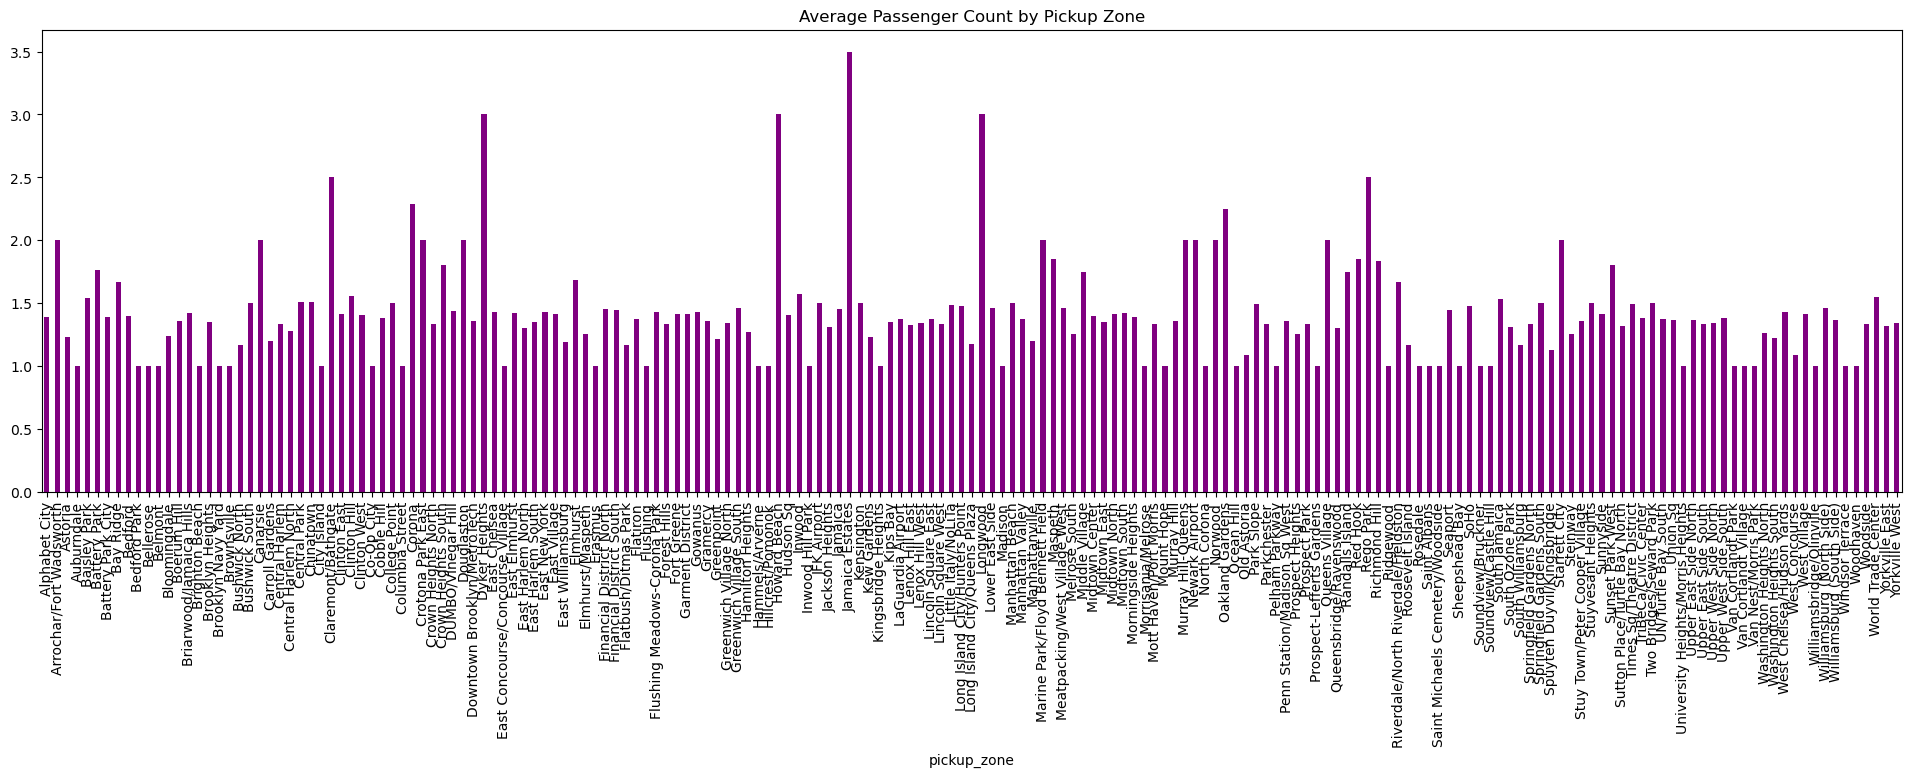

In [182]:
# How does passenger count vary across zones
# Group the data by PULocationID and calculate the average passenger count
passenger_count_per_zone = df1.groupby('pickup_zone')['passenger_count'].mean()

plt.figure(figsize=(24, 6))
plt.xticks(rotation=90)
# Plot the average passenger count for different zones
passenger_count_per_zone.plot(kind='bar', color='purple')
plt.title('Average Passenger Count by Pickup Zone')
plt.show()


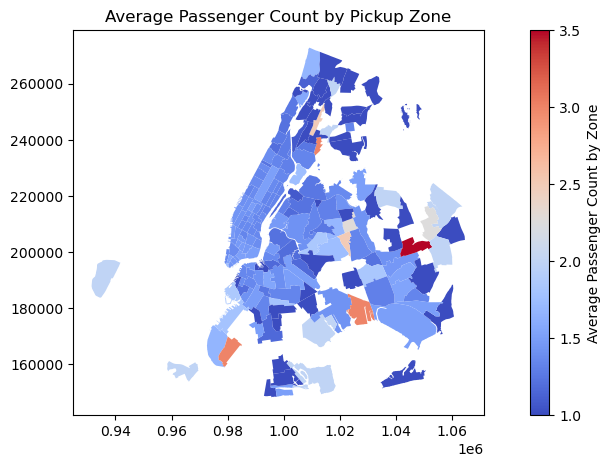

In [183]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones['avg_passenger_count'] = zones['pickup_zone'].map(passenger_count_per_zone)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 5))

# Plot the map and display it
zones.plot(column='avg_passenger_count', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Average Passenger Count by Zone"})
plt.title('Average Passenger Count by Pickup Zone')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

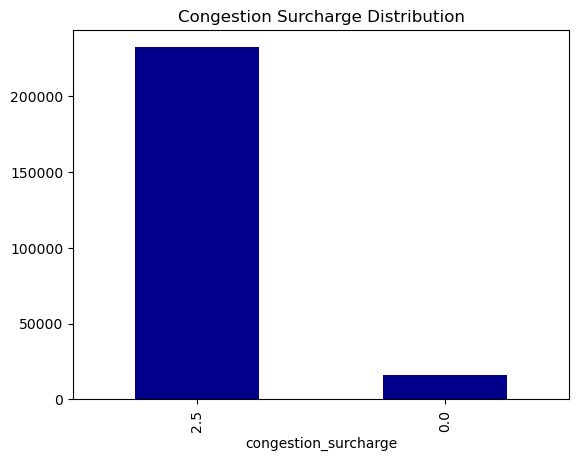

congestion_surcharge
2.5    231768
0.0     16417
Name: count, dtype: int64

In [184]:
# How often is each surcharge applied?
# Group the data by congestion_surcharge and count the number of trips for each surcharge
surcharge_distribution = df1['congestion_surcharge'].value_counts()

# Plot the histogram for surcharge_distribution
surcharge_distribution.plot(kind='bar', color='darkBlue')
plt.title('Congestion Surcharge Distribution')
plt.show()

# How often is each surcharge applied? give number
surcharge_distribution



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [185]:
# Optimized Taxi Deployment Schedule
# Morning Rush (7 AM - 10 AM)
# Key Routes: Residential areas (Brooklyn, Queens, Upper Manhattan) → Business hubs (Midtown, Downtown Manhattan).

# Evening Rush (5 PM - 8 PM)
# Key Routes: Business hubs (Midtown, Financial District) → Residential areas.

# Late Night (10 PM - 2 AM)
# Key Zones: Entertainment districts (Times Square, SoHo, East Village, Meatpacking District).

# Early Morning (2 AM - 6 AM)
# Key Zones: Airports (JFK, LaGuardia) and 24-hour business hubs.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [186]:
# Strategically position taxis in high-demand areas, such as Midtown during rush hours and entertainment districts at night.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [187]:
# Revenue share peaks during the evening rush hours.
# Midtown and the Financial District are the busiest zones during this time.
# The average fare per mile per passenger is highest in the evening rush hours.
# Long-distance trips yield the highest fare per mile per passenger.